# Predicting Movie Success:  
### Analyzing Box Office Performance, IMDb Ratings, and Genre Trends Using Machine Learning

## Problem Statement: 
The film industry faces significant challenges in predicting the success of movies due to the substantial financial investments involved. With numerous films released each year, stakeholders need to understand the factors influencing box office performance. Key aspects to explore include the impact of a film's budget, the roles of directors and actors, genre popularity, critical reception, and awards recognition. This case study aims to identify the relationships among these variables to develop predictive models that can guide future projects. By addressing these challenges, the analysis seeks to provide actionable insights for optimizing resource allocation and enhancing profitability, ultimately helping filmmakers make informed decisions in a competitive market.

## Dataset Overview:
The dataset contains various features related to films, including:

Movie: Title of the film.

Director: Name of the director.

Running Time: Length of the movie in minutes.

Actors: Three main actors in the film.

Genre: Film category (e.g., drama, comedy).

Budget: Total investment in the film.

Box Office: Revenue generated from ticket sales.

Earnings: Difference between box office revenue and budget.

Oscar and Golden Globe Nominations/Awards: Counts of nominations and awards received.

Release Year: Year the movie was released.


IMDb Score: Rating out of 10 based on audience feedback.


## Tasks to be Performed:

#### Data Cleaning: 
Handle missing values, remove duplicates, and correct inconsistencies in the dataset.

#### Data Preprocessing: 
Encode categorical variables, scale numerical features, and create new features as needed.

#### Exploratory Data Analysis (EDA): 
Analyze data distributions, trends, and relationships between features using statistical summaries and visualizations.

#### Visualization:
Create various plots (bar charts, scatter plots, heatmaps) to communicate insights effectively.

#### Machine Learning:
Select appropriate models, train them on the dataset, evaluate performance, and optimize hyperparameters for predictive accuracy.

In [1]:
#importing the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data set
path='E:/Project Dataset/Movies data/movies_data.csv'
df= pd.read_csv(path, encoding='ISO-8859-1')
print(df)

                           Movie         Director  Running time  \
0                       13 Hours      Michael Bay           144   
1                      16 Blocks   Richard Donner           102   
2                       17 Again      Burr Steers           102   
3                           1982     Tommy Oliver            90   
4               2 Fast 2 Furious   John Singleton           107   
...                          ...              ...           ...   
3969                     Z Storm        David Lam            92   
3970  Zack and Miri Make a Porno      Kevin Smith           101   
3971                 Zero Effect      Jake Kasdan           116   
3972                  Zombieland  Ruben Fleischer            88   
3973                        Zulu     Jér?me Salle           110   

              Actor 1           Actor 2                    Actor 3      Genre  \
0       Toby Stephens  James Badge Dale            David Costabile     Action   
1        Bruce Willis       David

#### Basic Operations:

In [3]:
type (df)  #Shows the type of the dataset

pandas.core.frame.DataFrame

In [4]:
df.columns  #Shows the name of the columns

Index(['Movie', 'Director', 'Running time', 'Actor 1', 'Actor 2', 'Actor 3',
       'Genre', 'Budget', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Earnings',
       'Oscar and Golden Globes nominations', 'Oscar and Golden Globes awards',
       'Release year', 'IMDb score'],
      dtype='object')

In [5]:
df.head() #shows the first five rows of the dataset

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,James Badge Dale,David Costabile,Action,50000000,69400000,50.00,69.23,19400000,0,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,David Zayas,Sasha Roiz,Action,52000000,65000000,33.33,50.00,13000000,0,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,20000000,139000000,44.44,25.00,119000000,0,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,1000000,2000000,50.00,100.00,1000000,0,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Cole Hauser,Mo Gallini,Action,76000000,236000000,75.00,42.85,160000000,0,0.0,2003,5.9


In [6]:
df.tail() # gives the last five rows

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
3969,Z Storm,David Lam,92,Michael Wong,Louis Koo,Stephen Au,Action,7000000,17000000,100.00,100.00,10000000,0,0.0,2014,5.3
3970,Zack and Miri Make a Porno,Kevin Smith,101,Gerry Bednob,Jeff Anderson,Jennifer Schwalbach Smith,Comedy,24000000,42000000,66.67,41.66,18000000,0,0.0,2008,6.6
3971,Zero Effect,Jake Kasdan,116,Kim Dickens,Ryan O'Neal,Angela Featherstone,Comedy,5000000,2000000,33.33,50.00,-3000000,0,0.0,1998,7.0
3972,Zombieland,Ruben Fleischer,88,Emma Stone,Bill Murray,Derek Graf,Adventure,23600000,102000000,66.67,33.33,78400000,0,0.0,2009,7.7
3973,Zulu,Jér?me Salle,110,Orlando Bloom,Tanya van Graan,Conrad Kemp,Crime,16000000,5000000,0.00,0.00,-11000000,0,0.0,2013,6.7


In [7]:
df.shape  #gives the shape of the data set

(3974, 16)

In [8]:
df.info() #gives column name and its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3974 non-null   object 
 1   Director                             3974 non-null   object 
 2   Running time                         3974 non-null   int64  
 3   Actor 1                              3974 non-null   object 
 4   Actor 2                              3974 non-null   object 
 5   Actor 3                              3972 non-null   object 
 6   Genre                                3974 non-null   object 
 7   Budget                               3974 non-null   int64  
 8   Box Office                           3974 non-null   int64  
 9   Actors Box Office %                  3974 non-null   float64
 10  Director Box Office %                3974 non-null   float64
 11  Earnings                      

In [9]:
print(df.describe())  # Summary statistics

       Running time        Budget    Box Office  Actors Box Office %  \
count   3974.000000  3.974000e+03  3.974000e+03         3.974000e+03   
mean     109.967036  3.690639e+07  1.086770e+08         2.984678e+09   
std       22.507658  4.270431e+07  1.798354e+08         1.344684e+11   
min       20.000000  1.100000e+03  5.000000e+04         0.000000e+00   
25%       95.000000  9.000000e+06  1.200000e+07         3.333000e+01   
50%      106.000000  2.200000e+07  4.300000e+07         5.714000e+01   
75%      120.000000  5.000000e+07  1.250000e+08         8.333000e+01   
max      330.000000  3.900000e+08  2.923000e+09         6.805556e+12   

       Director Box Office %      Earnings  \
count            3974.000000  3.974000e+03   
mean               52.780695  7.177060e+07   
std                35.360199  1.526573e+08   
min                 0.000000 -3.231000e+08   
25%                25.000000  0.000000e+00   
50%                50.000000  1.850000e+07   
75%                80.000000 

In [10]:
print(df.dtypes) #Data Type Validation

Movie                                   object
Director                                object
Running time                             int64
Actor 1                                 object
Actor 2                                 object
Actor 3                                 object
Genre                                   object
Budget                                   int64
Box Office                               int64
Actors Box Office %                    float64
Director Box Office %                  float64
Earnings                                 int64
Oscar and Golden Globes nominations      int64
Oscar and Golden Globes awards         float64
Release year                             int64
IMDb score                             float64
dtype: object


# Data Cleaning

In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         3
Release year                           0
IMDb score                             0
dtype: int64


In [12]:
# Impute missing values for Oscar and Golden Globes awards column with the mean
df['Oscar and Golden Globes awards'] = df['Oscar and Golden Globes awards'].fillna(df['Oscar and Golden Globes awards'].mean())
missing_values = df.isnull().sum()
print(missing_values)

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         0
Release year                           0
IMDb score                             0
dtype: int64


In [13]:
# Impute missing values for Actor 3 column with 'Unknown'
df['Actor 3'] = df['Actor 3'].fillna('Unknown')
missing_values = df.isnull().sum()
print(missing_values)

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                0
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         0
Release year                           0
IMDb score                             0
dtype: int64


In [14]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

24


In [15]:
# Removing duplicates
df = df.drop_duplicates()

In [16]:
#again checking for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

0


In [17]:
# Convert 'Genre' column to lowercase for consistency
#df['Genre'] = df['Genre'].str.lower()

In [18]:
# Convert columns to appropriate data types
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Box Office'] = pd.to_numeric(df['Box Office'], errors='coerce')


In [19]:
# Check the data types of the columns
print(df.dtypes[['Budget', 'Box Office']])


Budget        int64
Box Office    int64
dtype: object


# Data Pre-Processing and EDA

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### 1. Encoding Categorical Variables
   Categorical variables (e.g., 'Genre', 'Director') need to be converted into numerical format before feeding into models. This can be done using one-hot encoding or label encoding.

In [21]:
le = preprocessing.LabelEncoder()
df['Director'] = le.fit_transform(df['Director'])

In [22]:
print (df['Director'])

0       1097
1       1362
2        159
3       1685
4        802
        ... 
3969     324
3970     926
3971     612
3972    1467
3973     883
Name: Director, Length: 3950, dtype: int32


Label Encoding: Converts 'Director' into numerical labels.

In [23]:
le = preprocessing.LabelEncoder()
df['Actor 1'] = le.fit_transform(df['Actor 1'])
print (df['Actor 1'])

0       1481
1        206
2       1023
3        175
4       1190
        ... 
3969    1079
3970     538
3971     864
3972     464
3973    1167
Name: Actor 1, Length: 3950, dtype: int32


In [24]:
le = preprocessing.LabelEncoder()
df['Actor 2'] = le.fit_transform(df['Actor 2'])
print (df['Actor 2'])

0        952
1        563
2        898
3       1961
4        453
        ... 
3969    1405
3970    1008
3971    1978
3972     241
3973    2150
Name: Actor 2, Length: 3950, dtype: int32


In [25]:
le = preprocessing.LabelEncoder()
df['Actor 3'] = le.fit_transform(df['Actor 3'])
print (df['Actor 3'])

0        621
1       2374
2       2563
3       2141
4       1921
        ... 
3969    2468
3970    1231
3971     148
3972     683
3973     535
Name: Actor 3, Length: 3950, dtype: int32


In [26]:
le = preprocessing.LabelEncoder()
df['Movie'] = le.fit_transform(df['Movie'])
print (df['Movie'])

0         10
1         13
2         14
3         18
4         19
        ... 
3969    3889
3970    3890
3971    3893
3972    3895
3973    3900
Name: Movie, Length: 3950, dtype: int32


In [27]:
le = preprocessing.LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
print (df['Genre'])

0       0
1       0
2       4
3       7
4       0
       ..
3969    0
3970    4
3971    4
3972    1
3973    5
Name: Genre, Length: 3950, dtype: int32


In [28]:
# One-hot encoding for categorical variables (example: Genre)
#df= pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [29]:
df.head

<bound method NDFrame.head of       Movie  Director  Running time  Actor 1  Actor 2  Actor 3  Genre  \
0        10      1097           144     1481      952      621      0   
1        13      1362           102      206      563     2374      0   
2        14       159           102     1023      898     2563      4   
3        18      1685            90      175     1961     2141      7   
4        19       802           107     1190      453     1921      0   
...     ...       ...           ...      ...      ...      ...    ...   
3969   3889       324            92     1079     1405     2468      0   
3970   3890       926           101      538     1008     1231      4   
3971   3893       612           116      864     1978      148      4   
3972   3895      1467            88      464      241      683      1   
3973   3900       883           110     1167     2150      535      5   

        Budget  Box Office  Actors Box Office %  Director Box Office %  \
0     50000000    6

### 2. Feature Scaling
   Scaling ensures that numerical features like 'Budget' and 'Box Office' are in the same range, which helps many models perform better.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the 'Budget' and 'Box Office' columns
df[['Budget', 'Box Office']] = scaler.fit_transform(df[['Budget', 'Box Office']])


In [31]:
print(df[['Budget', 'Box Office']].head())


     Budget  Box Office
0  0.128203    0.023726
1  0.133331    0.022221
2  0.051279    0.047538
3  0.002561    0.000667
4  0.194870    0.080723


In [32]:
# top 5 directors
df['Director'].value_counts().head(5)

Director
1590    26
1749    21
244     20
1055    18
1541    16
Name: count, dtype: int64

In [33]:
# top 10 movie based on IMDB 

df[['IMDb score', 'Movie']].sort_values(by='IMDb score', ascending=False).head(10)

,IMDb score,Movie
1901,9.3,3410
1940,9.2,3023
2792,9.1,1583
1948,9.0,3024
1916,9.0,2938
3143,8.9,2225
3541,8.9,3032
1975,8.9,5
3243,8.9,2419
1968,8.9,3205


In [34]:
# 5 highest earnings 
df[['Earnings', 'Movie']].sort_values(by='Earnings', ascending=False).head(5)

,Earnings,Movie
1956,2686000000,315
1962,2000000000,3596
527,1520000000,1562
1797,1359000000,1129
1721,1299000000,2812


In [35]:
# total movies in a year
df.groupby('Release year').Movie.count().tail(10)

Release year
2007    157
2008    183
2009    180
2010    177
2011    176
2012    168
2013    172
2014    183
2015    148
2016     80
Name: Movie, dtype: int64

# Data Visualization

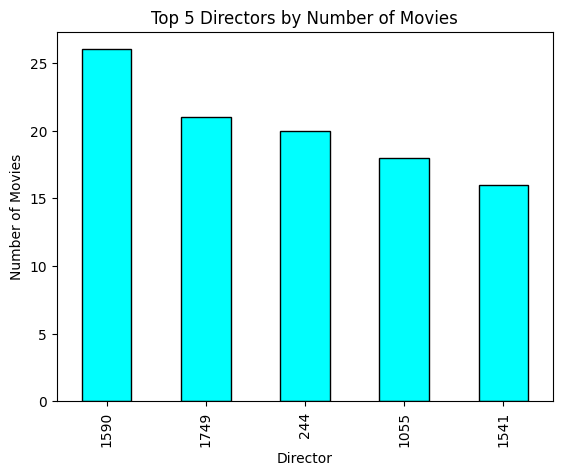

In [36]:
import matplotlib.pyplot as plt

# Group by Director and count their movies
top_5_directors = df['Director'].value_counts().head(5)

# Plot the data
top_5_directors.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Top 5 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()


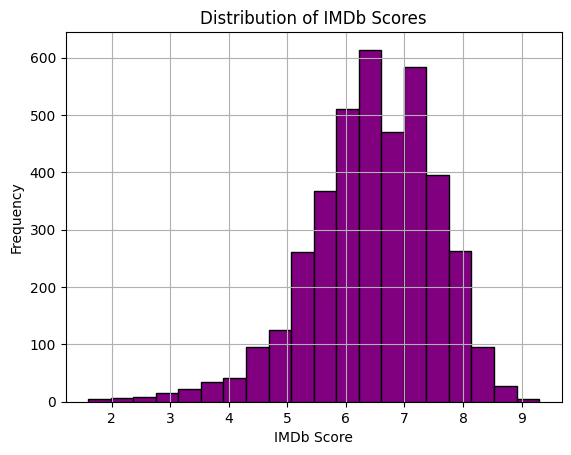

In [37]:
#Distribution of IMDb Scores
plt.hist(df['IMDb score'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


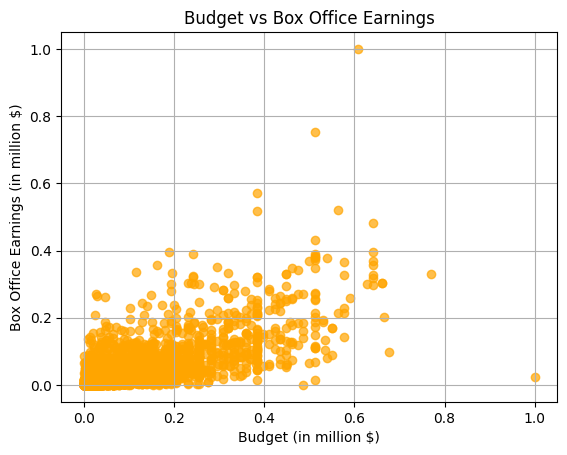

In [38]:
#Relationship Between Budget and Box Office Earnings
plt.scatter(df['Budget'], df['Box Office'], color='orange', alpha=0.7)
plt.title('Budget vs Box Office Earnings')
plt.xlabel('Budget (in million $)')
plt.ylabel('Box Office Earnings (in million $)')
plt.grid(True)
plt.show()


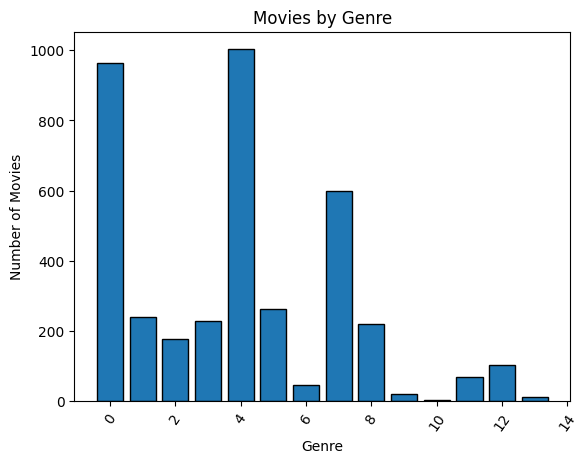

In [39]:
import matplotlib.pyplot as plt

# Count the frequency of each genre
genre_counts = df['Genre'].value_counts()

# Create a bar plot for genres
plt.bar(genre_counts.index, genre_counts.values, edgecolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=55)

# Add title and labels
plt.title('Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()


In [40]:
#Scatter Plot for Budget vs IMDb Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Budget', y='IMDb score', data=df, color='blue', edgecolor='black')
plt.title('Budget vs IMDb Score')
plt.xlabel('Budget')
plt.ylabel('IMDb Score')
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

##### Conclusion: 
Shows the direct relationship between budget and IMDb score.

In [42]:
#Correlation of Numeric Features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

##### Conclusion: 
IMDb scores are weakly correlated with budget and earnings, indicating other factors like content quality may drive audience ratings.



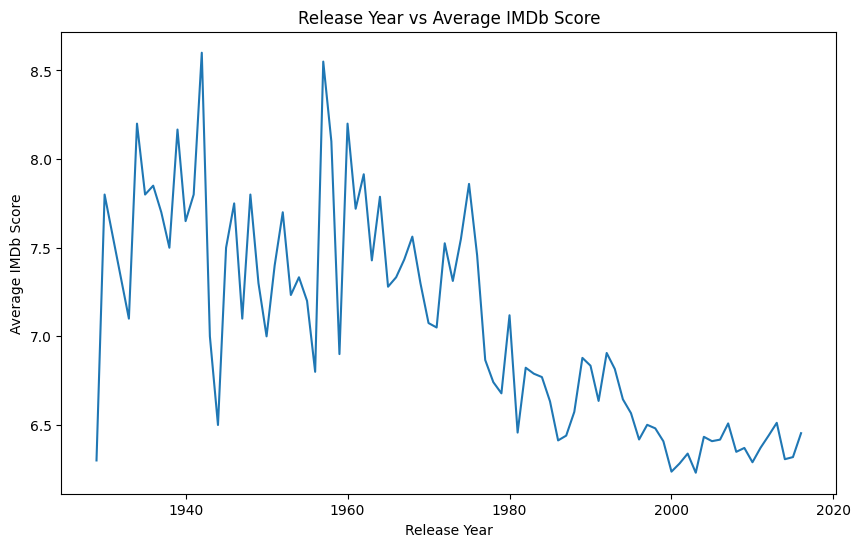

In [41]:
#Release Year vs Average IMDb Score
avg_score_by_year = df.groupby('Release year')['IMDb score'].mean()
avg_score_by_year.plot(kind='line', figsize=(10, 6))
plt.title('Release Year vs Average IMDb Score')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.show()


##### Conclusion:
IMDb scores have fluctuated over the years, with noticeable peaks and troughs that may reflect industry trends.

In [ ]:
#Scatter Plot: Box Office vs IMDb Score
sns.scatterplot(x='Box Office', y='IMDb score', data=df, color='green', edgecolor='black')
plt.title('Box Office vs IMDb Score')
plt.xlabel('Box Office Earnings')
plt.ylabel('IMDb Score')
plt.show()


##### Conclusion:
Movies with higher box office earnings generally have better IMDb scores, but some high-grossing movies have lower ratings.



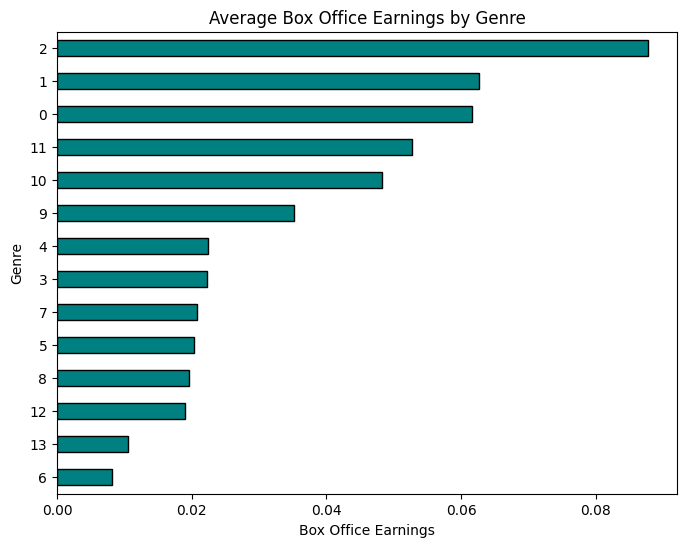

In [43]:
# Stacked Bar Chart: Genre vs Average Box Office Earnings
avg_box_office = df.groupby('Genre')['Box Office'].mean().sort_values()
avg_box_office.plot(kind='barh', stacked=True, color='teal', edgecolor='black', figsize=(8, 6))
plt.title('Average Box Office Earnings by Genre')
plt.xlabel('Box Office Earnings')
plt.ylabel('Genre')
plt.show()


##### Conclusion:
Some genres consistently outperform others at the box office, reflecting audience preferences.

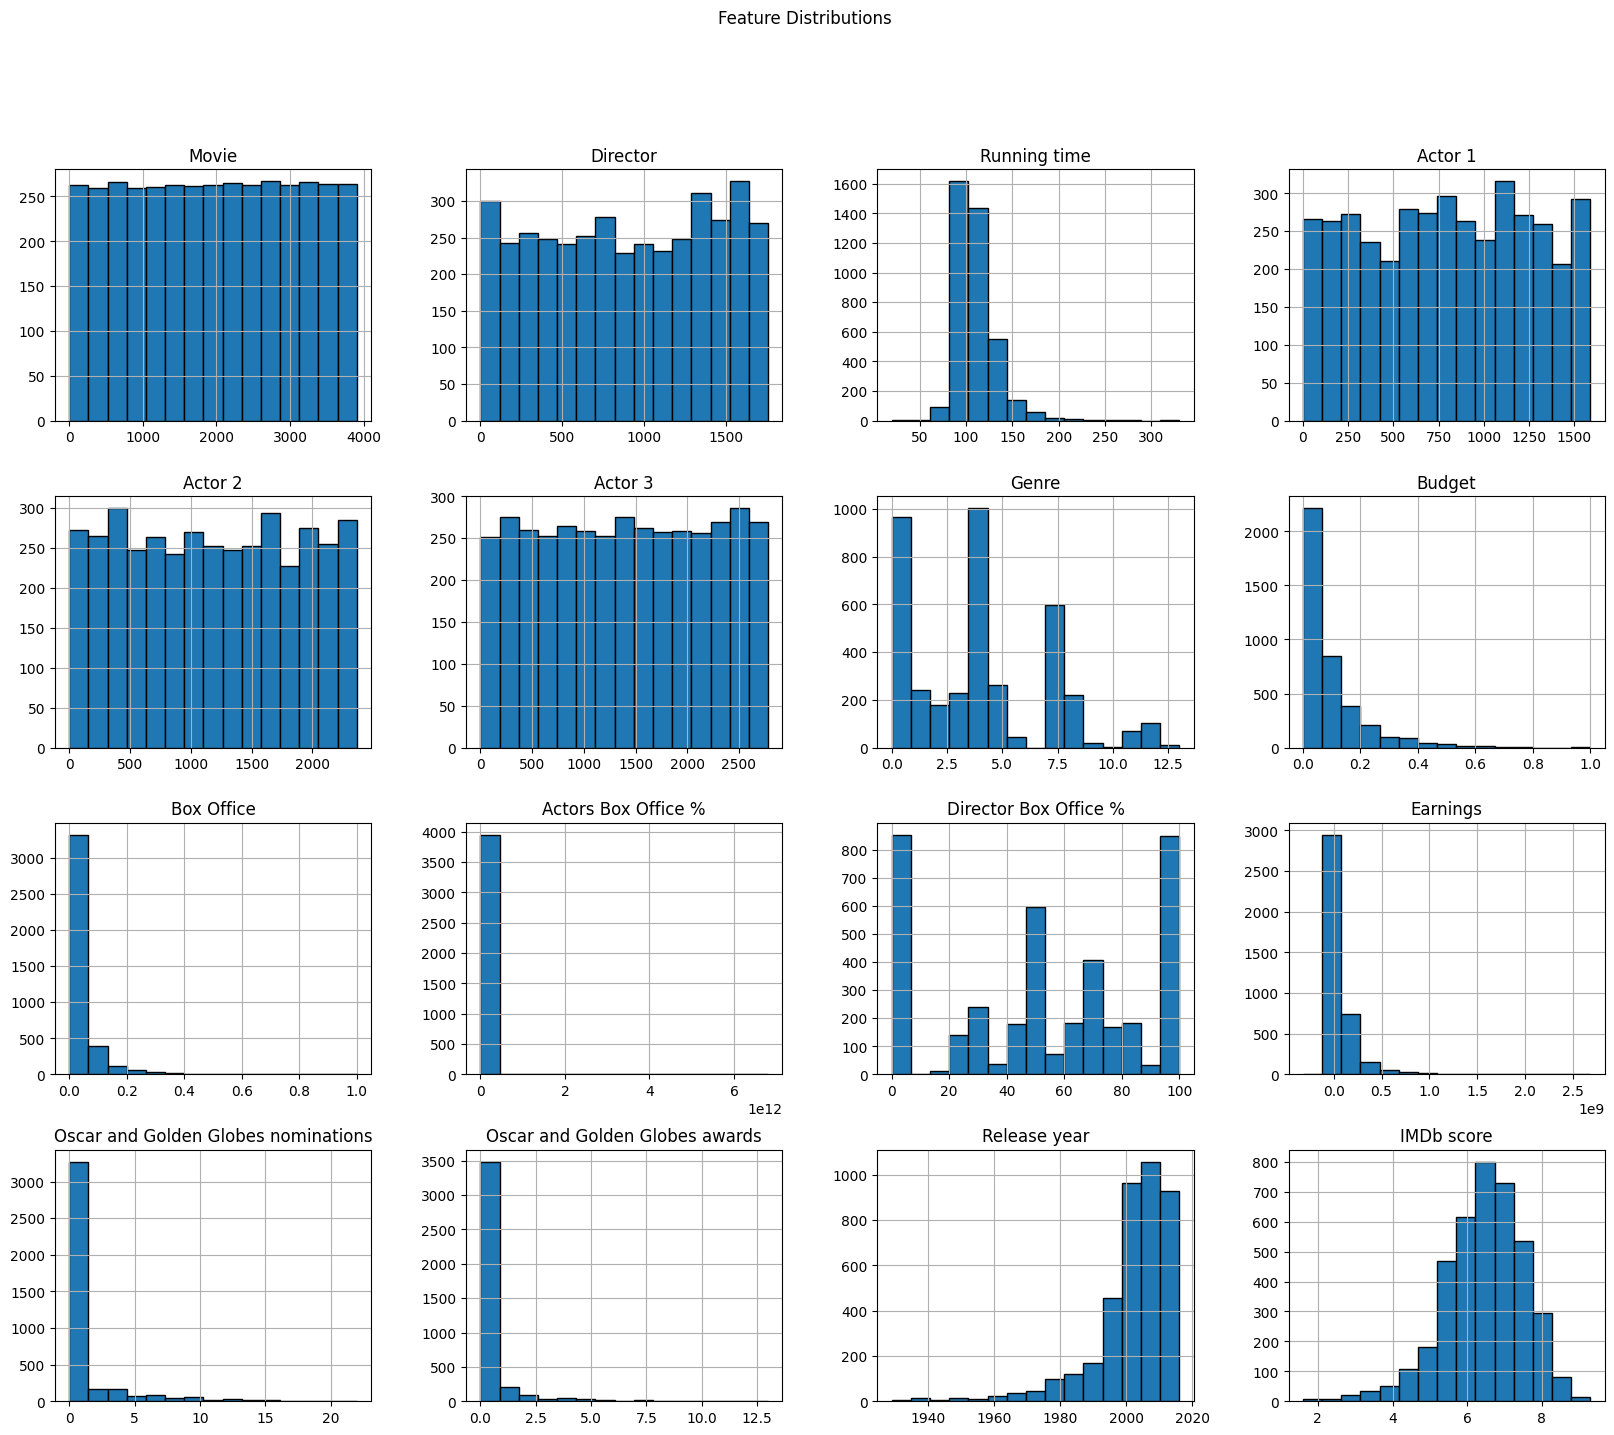

In [44]:
# Plot histograms for each column
df.hist(figsize=(20, 16), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

##### Conclusion:
The histograms reveal how data is distributed, helping identify preprocessing needs like scaling, handling outliers, or addressing skewness.

# Machine Learning Algorithms Overview :

Machine learning (ML) involves using algorithms to analyze data, learn patterns, and make predictions or decisions without explicit programming. These algorithms are categorized based on how they learn from the data.

#### ML algorithms can be broadly categorized into Supervised Learning and Unsupervised Learning based on the type of data used for training.

### 1. Supervised Learning:
   
Definition: Supervised learning algorithms are trained on labeled data, meaning the dataset includes both input features and corresponding output labels (or target values). The model learns to predict the output based on the input data.

Use Cases:

##### Classification: 
Assigning categories to data points (e.g., spam detection, image classification).

##### Regression:
Predicting continuous values (e.g., predicting house prices, stock market trends).

##### Common Algorithms:
 
1.) Linear Regression: Used for predicting a continuous output variable.

2.) Logistic Regression: Used for binary classification tasks.

3.) Decision Trees: Used for both classification and regression, builds a tree-like model based on features.

4.) K-Nearest Neighbors (KNN): Classifies data points based on the majority label of the nearest neighbors.

5.) Random Forest: An ensemble of decision trees that enhances prediction accuracy by reducing overfitting.


6.) Naive Bayes: A probabilistic classifier based on Bayes' theorem, assuming independence between features. Useful for text classification, such as spam filtering.

# 1.) Linear Regression : 
Used for predicting a continuous output variable.

In [45]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
X=df.drop('IMDb score', axis=1) #axis=1 for column, axis=0 for rows
y= df['IMDb score'] 

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
x=np.array(X).reshape((-1,1))
y=np.array(y).reshape((-1,1))
print(X)

      Movie  Director  Running time  Actor 1  Actor 2  Actor 3  Genre  \
0        10      1097           144     1481      952      621      0   
1        13      1362           102      206      563     2374      0   
2        14       159           102     1023      898     2563      4   
3        18      1685            90      175     1961     2141      7   
4        19       802           107     1190      453     1921      0   
...     ...       ...           ...      ...      ...      ...    ...   
3969   3889       324            92     1079     1405     2468      0   
3970   3890       926           101      538     1008     1231      4   
3971   3893       612           116      864     1978      148      4   
3972   3895      1467            88      464      241      683      1   
3973   3900       883           110     1167     2150      535      5   

        Budget  Box Office  Actors Box Office %  Director Box Office %  \
0     0.128203    0.023726                50.00  

In [49]:
# Initialize and train the Linear Regression model
model = LinearRegression()

In [50]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#### Why Metrics Matter:

##### R² Score: 
Tells us how well the model explains the variability in the data.

If R² is close to 1, the model is excellent.
If R² is near 0, the model isn't explaining much and needs improvement.

##### MSE (Mean Squared Error):
Measures the average difference between the predicted and actual values.

A lower MSE means the model is more accurate.
A high MSE indicates the predictions are far from the actual values.

In [52]:
# Print the results
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.8645386571094363


In [53]:
print("R^2 Score:", r2)

R^2 Score: 0.2632374035541485


In [54]:
print("Model Coefficients: ",  model.coef_)

Model Coefficients:  [ 3.23860497e-05  3.78080632e-06  1.14034837e-02  4.53291643e-05
 -2.77984599e-05 -1.14734524e-05  1.49133510e-02 -9.36894139e-01
 -1.25006478e-01  8.51460634e-14  2.47319689e-03  1.09151088e-09
  1.36734066e-01 -8.11658531e-02 -7.10169441e-03]


In [55]:
print("Model Intercept:", model.intercept_)

Model Intercept: 19.067958141194207


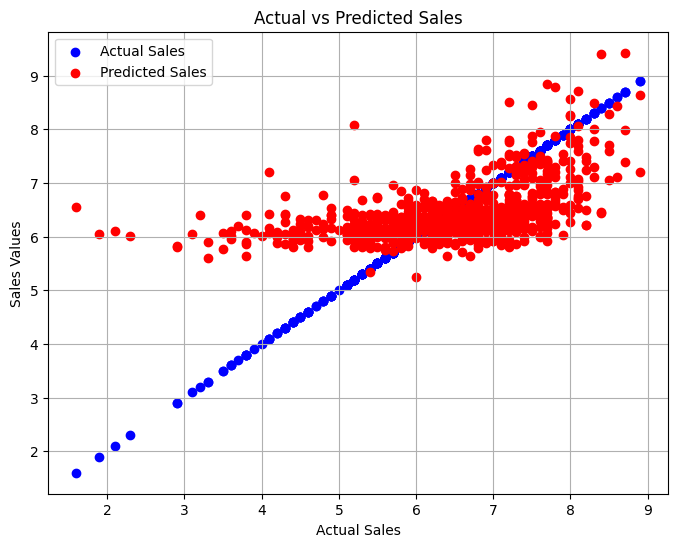

In [56]:
# Plot actual vs predicted sales with different colors
plt.figure(figsize=(8, 6))

# Plot actual test values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual Sales')

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', label='Predicted Sales')

plt.xlabel("Actual Sales")
plt.ylabel("Sales Values")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


##### Conclusion:

The linear regression model doesn't explain much of the data, with an R² score of only 0.26. This means it only accounts for about 26% of the variation in the target variable, so the model isn't very accurate. The Mean Squared Error (MSE) of 0.86 shows that the model's predictions are off by a moderate amount.

Overall, this model isn't very good at making predictions, and there is room for improvement. We could try other algorithms or better features to improve the model's performance.

With an R² of 0.26, the model doesn't explain the data well.

The MSE of 0.86 suggests that the predictions are moderately off.

# 2.) Logistic Regression: 
Used for binary classification. like(0,1). it can also be used for multiple classifiers. It is not a regression technique. We use sigmoid function in logistic regression. By this we will get value between 0 to 1. then we will give threshold value like(<0.5=1 else 0). Hence it is classified into 0 and 1. We use value form linear regression in the formula of sigmoid function. Machine learning= function approximtion ( trying to approx the values) in logistic regression we have to maximize the(LLF) log-likelihood function.(IMP)

In [57]:
# Import necessary library for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation
from sklearn.preprocessing import StandardScaler  # For feature scaling
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
X=df.drop('IMDb score', axis=1) #axis=1 for column, axis=0 for rows
# We are classifying based on IMDb score, let's set a threshold (e.g., 7.0) for high/low IMDb scores
y = np.where(df['IMDb score'] >= 7.0, 1, 0)  # 1 for High IMDb score (>=7), 0 for Low IMDb score (<7)

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Standardizing the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [63]:
#Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy }")

Accuracy: 0.7531645569620253


The model achieved 75.32% accuracy, meaning it correctly predicted the IMDb score class (≥7.0 or <7.0) 75.32% of the time.

In [64]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[480  27]
 [168 115]]


The model performs well at predicting low-rated movies (IMDb < 7.0) but struggles with predicting high-rated movies (IMDb ≥ 7.0), leading to 168 false negatives.

In [65]:
 #Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       507
           1       0.81      0.41      0.54       283

    accuracy                           0.75       790
   macro avg       0.78      0.68      0.69       790
weighted avg       0.77      0.75      0.73       790



#### Precision and Recall:

For IMDb < 7.0: 
High precision (74%) and excellent recall (95%).

For IMDb ≥ 7.0:
Good precision (81%) but low recall (41%).


F1-Score:
The F1-score for low-rated movies is 0.83, but for high-rated movies, it’s 0.54, indicating that the model struggles to identify high-rated movies effectively.

##### Conclusion:
The model is biased towards predicting low-rated movies, with room for improvement in predicting high-rated ones.

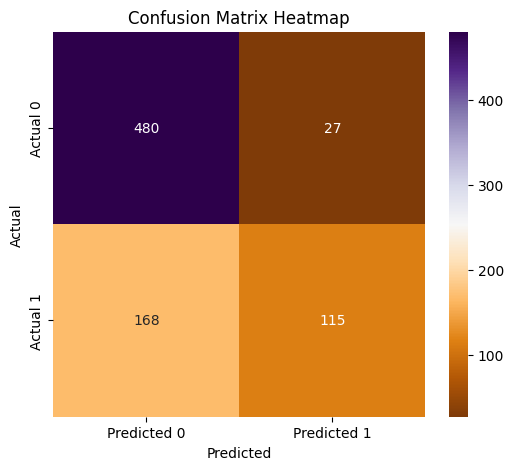

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuOr', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Confusion Matrix Heatmap:

The heatmap clearly shows that the model is performing well at predicting low-rated movies (IMDb < 7.0) with a high True Negative (TN) count (480), which means the model correctly identified many low-rated movies.


However, the model struggles with high-rated movies (IMDb ≥ 7.0), as indicated by a relatively high False Negative (FN) count (168). This means the model is missing many high-rated movies.


# 3.) Decision Trees:
Used for both classification and regression, builds a tree-like model based on features.
Here, we are using Decision Trees for both classification and regression tasks:

Classification: To predict categories, e.g., Genre.

Regression: To predict continuous values, e.g., IMDb score.


Decision Trees are easy to understand, interpret, and handle both categorical and numerical features effectively. They can also identify the most important features automatically.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


To make the models efficient, we first analyze the importance of features using correlation (for numeric features) and decision tree-based feature importance.

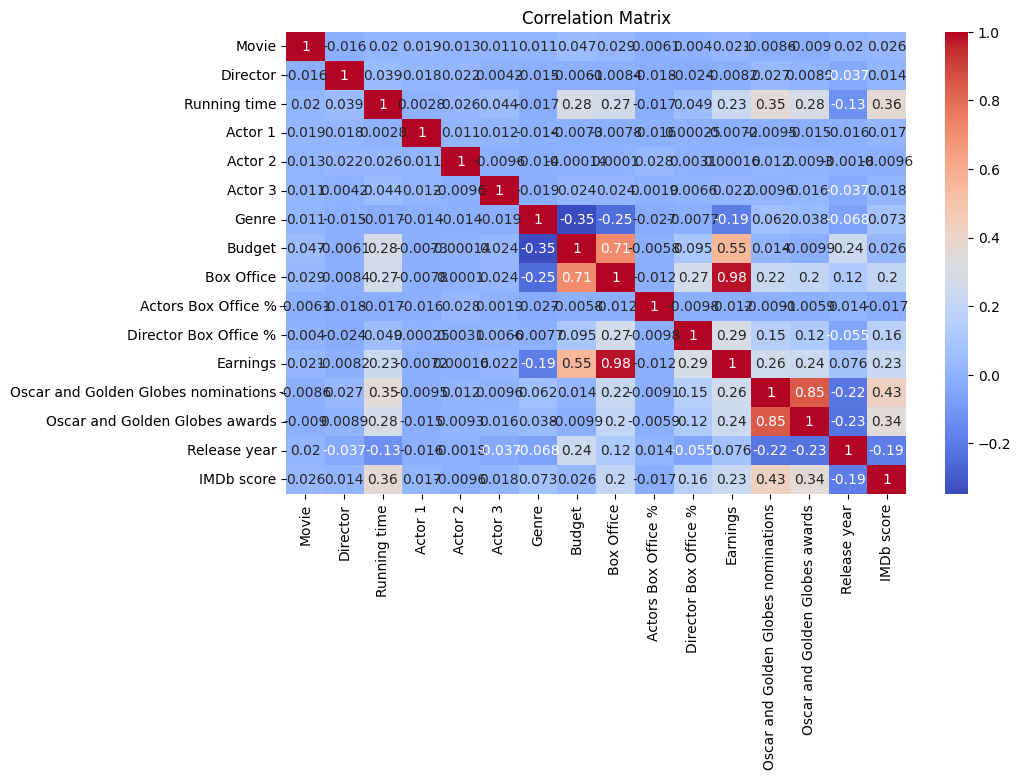

In [68]:
# Correlation Matrix for numeric features
plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Classification with Selected Features:
Based on feature importance and correlation, select relevant features for classification.

In [69]:
# Feature Importance using Decision Tree Classifier
X = df.drop(['Genre', 'IMDb score'], axis=1)  # Drop target columns
y_classification = df['Genre']  # Target for classification

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y_classification)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance (Classification):")
print(feature_importance)

Feature Importance (Classification):
                                Feature  Importance
2                          Running time    0.119637
6                                Budget    0.106522
4                               Actor 2    0.087968
1                              Director    0.085554
10                             Earnings    0.080184
5                               Actor 3    0.079667
0                                 Movie    0.079537
3                               Actor 1    0.074799
13                         Release year    0.072289
7                            Box Office    0.066609
8                   Actors Box Office %    0.059965
9                 Director Box Office %    0.045319
11  Oscar and Golden Globes nominations    0.033921
12       Oscar and Golden Globes awards    0.008029


In [70]:
# Selecting top features based on importance
selected_features_class = ['Running time', 'Budget', 'Actor 2', 'Director', 'Earnings']
X_class = df[selected_features_class]
y_class = df['Genre']

In [71]:
# Train-test split
trainX, testX, trainY, testY = train_test_split(X_class, y_class, test_size=0.3, random_state=42)


In [72]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for simplicity
clf.fit(trainX, trainY)

DecisionTreeClassifier(max_depth=3, random_state=42)

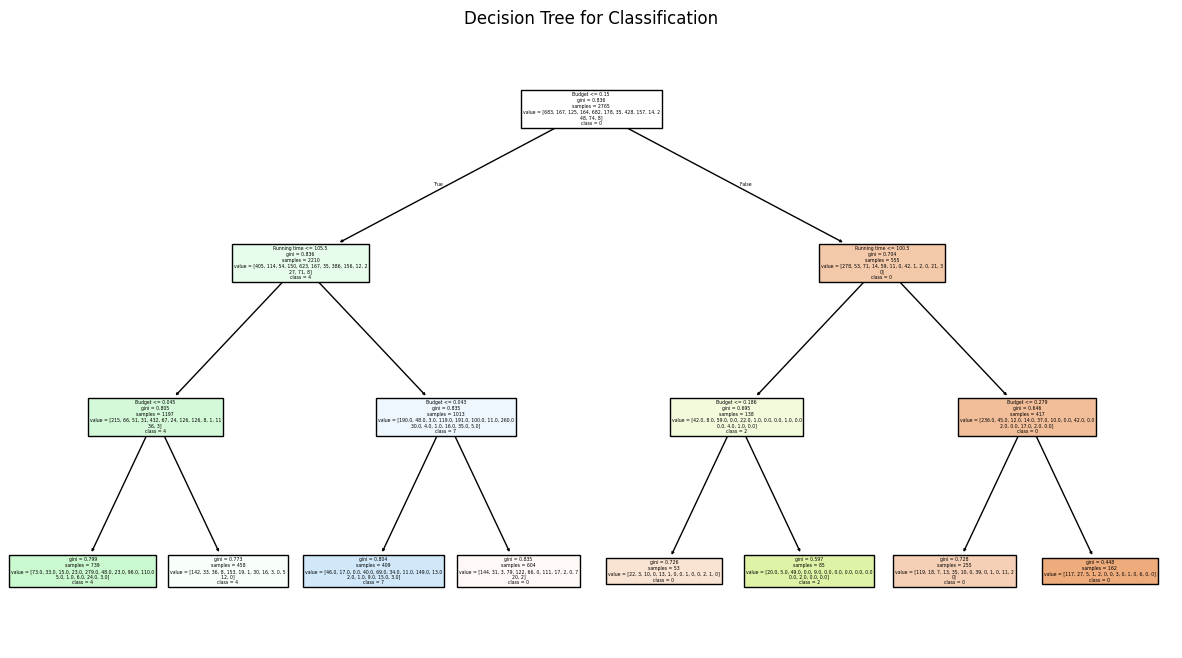

In [73]:
# Plotting the decision tree
plt.figure(figsize=(15, 8))
plot_tree(
    clf,
    feature_names=selected_features_class,
    class_names=[str(cls) for cls in clf.classes_],  # Convert class names to strings
    filled=True,
)
plt.title('Decision Tree for Classification')
plt.show()

In [74]:
# Predictions and Evaluation
predictions = clf.predict(testX)

In [75]:
# Classification Report with zero_division=0 to handle undefined metrics
print("Classification Report:\n", classification_report(testY, predictions, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.57      0.44       281
           1       0.00      0.00      0.00        74
           2       0.50      0.44      0.47        52
           3       0.00      0.00      0.00        66
           4       0.41      0.64      0.50       321
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00        11
           7       0.30      0.33      0.31       171
           8       0.00      0.00      0.00        62
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00         3

    accuracy                           0.38      1185
   macro avg       0.11      0.14      0.12      1185
weighted avg       0.26      0.38      0.31      1185



In [76]:
#Accuracy Score
print("Accuracy Score:", accuracy_score(testY, predictions))

Accuracy Score: 0.3755274261603376


The model's accuracy is 37.55%, which is low.

In [77]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(testY, predictions))

Confusion Matrix:
 [[161   0  14   0  86   0   0  20   0   0   0   0   0   0]
 [ 37   0   5   0  24   0   0   8   0   0   0   0   0   0]
 [ 10   0  23   0  18   0   0   1   0   0   0   0   0   0]
 [ 32   0   0   0  10   0   0  24   0   0   0   0   0   0]
 [ 74   0   4   0 204   0   0  39   0   0   0   0   0   0]
 [ 43   0   0   0  23   0   0  20   0   0   0   0   0   0]
 [  1   0   0   0   8   0   0   2   0   0   0   0   0   0]
 [ 62   0   0   0  52   0   0  57   0   0   0   0   0   0]
 [ 11   0   0   0  44   0   0   7   0   0   0   0   0   0]
 [  1   0   0   0   3   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  9   0   0   0   8   0   0   4   0   0   0   0   0   0]
 [ 14   0   0   0  10   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   1   0   0   0   0   0   0]]


Performance on Classes:

Some classes like 0 and 4 are better predicted, while others (e.g., 1, 3, 5) have 0% precision, meaning the model struggles with these classes.
Imbalance: There is a significant class imbalance, with some classes being much more frequent than others, which is likely affecting the model's performance.



#### Code for Regression:

For regression, we’ll focus on features correlating well with IMDb score. Based on prior analysis, we'll use:
Box Office , Budget,Actors Box Office %

In [78]:
# Selecting features for regression
selected_features_reg = ['Box Office', 'Budget', 'Actors Box Office %']
X_reg = df[selected_features_reg]
y_reg = df['IMDb score']


In [79]:
# Train-test split
trainX_reg, testX_reg, trainY_reg, testY_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [80]:
# Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(trainX_reg, trainY_reg)

DecisionTreeRegressor(max_depth=3, random_state=42)

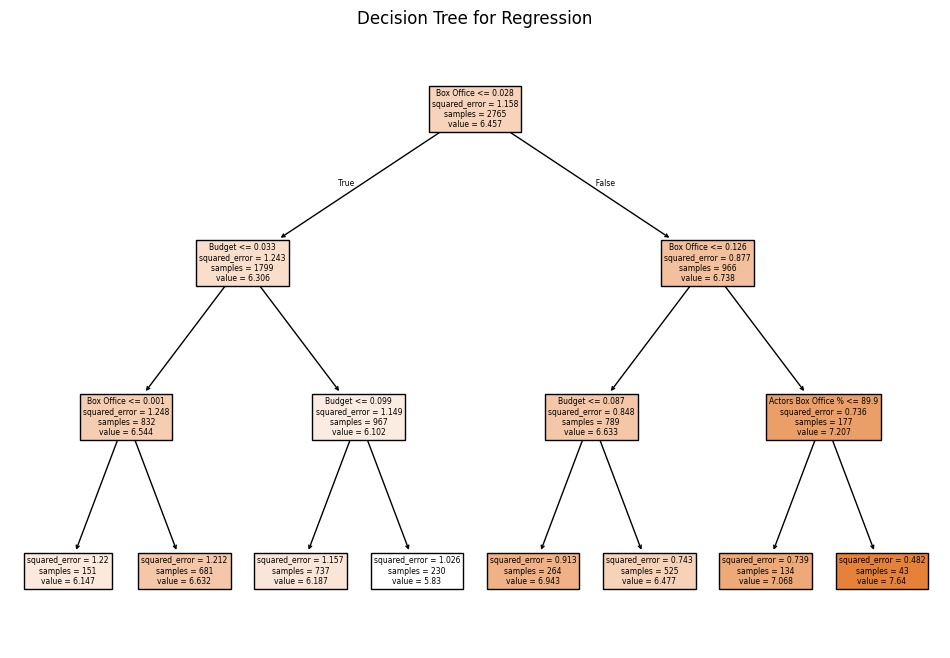

In [81]:
# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=selected_features_reg, filled=True)
plt.title('Decision Tree for Regression')
plt.show()

In [82]:
# Predictions and Evaluation
predictions_reg = reg.predict(testX_reg)

In [83]:
mse = mean_squared_error(testY_reg, predictions_reg)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.0762061916593464


The MSE value of 1.08 indicates that the model's predictions deviate significantly from the actual values. The lower the MSE, the better, so this suggests that the model is not performing optimally.

In [84]:
r2 = r2_score(testY_reg, predictions_reg)
print("R-squared (R2):", r2)

R-squared (R2): 0.04704935332873761


The R² value of 0.047 is very low, indicating that the model explains only 4.7% of the variance in the target variable. This suggests that the model is not capturing the underlying patterns of the data effectively.

# 4.) K-Nearest Neighbors (KNN): 
Classifies data points based on the majority label of the nearest neighbors.

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
X = df.drop('IMDb score', axis=1)  # Features
y = df['IMDb score']  # Target variable

In [87]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5) 

In [90]:
# Fit the model on the training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [91]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)
y_pred

array([6.3 , 5.64, 7.04, 6.12, 7.68, 6.58, 6.04, 6.08, 5.7 , 5.46, 6.66,
       7.4 , 6.02, 5.52, 6.66, 6.42, 5.92, 6.34, 6.18, 7.58, 5.7 , 7.18,
       5.72, 6.1 , 6.94, 5.72, 6.48, 6.52, 6.1 , 5.1 , 7.36, 5.86, 6.04,
       6.34, 5.58, 6.28, 6.12, 6.96, 8.02, 6.12, 6.18, 6.12, 5.78, 5.32,
       6.46, 6.14, 5.94, 5.9 , 6.24, 5.7 , 6.76, 5.1 , 5.2 , 7.98, 4.68,
       6.64, 7.58, 7.46, 6.92, 6.72, 6.44, 5.04, 6.22, 6.76, 6.2 , 5.92,
       5.8 , 5.94, 7.32, 5.9 , 6.  , 5.44, 6.3 , 5.48, 6.9 , 6.56, 5.88,
       6.84, 7.86, 6.7 , 6.8 , 5.1 , 6.38, 7.16, 5.68, 5.72, 5.68, 6.54,
       7.24, 6.62, 6.2 , 4.36, 5.82, 7.8 , 6.48, 6.4 , 6.48, 8.06, 5.96,
       6.62, 5.  , 6.4 , 6.32, 6.58, 6.1 , 6.46, 6.22, 6.26, 6.9 , 7.08,
       6.36, 7.22, 5.54, 6.48, 6.02, 7.04, 5.7 , 6.22, 6.3 , 6.86, 7.02,
       7.68, 5.92, 6.54, 6.38, 6.1 , 5.6 , 6.56, 7.24, 6.28, 6.12, 7.1 ,
       5.12, 6.9 , 6.36, 6.94, 5.94, 6.46, 6.08, 7.  , 5.92, 6.9 , 6.44,
       8.8 , 6.04, 6.9 , 7.62, 6.28, 6.82, 6.42, 7.

In [92]:
# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9293984810126582


Mean Squared Error: 0.9294 The error is relatively high, meaning the model's predictions are not very accurate.

In [93]:
from sklearn.metrics import mean_absolute_error, r2_score

In [94]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.7279999999999999
R² Score: 0.2079636550976819


Conclusion:
R² Score: 0.21: The model explains only 20.8% of the variance in IMDb scores, indicating poor predictive power.
    
Mean Absolute Error: 0.7280: On average, the model's predictions are off by about 0.728 points.

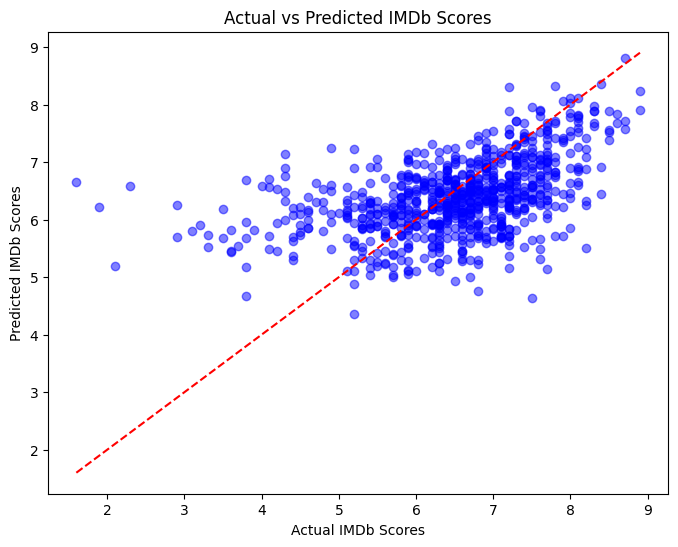

In [95]:
# Plot Actual vs Predicted IMDb Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Actual vs Predicted IMDb Scores")
plt.show()


# 5.) Random Forest: 
An ensemble of decision trees that enhances prediction accuracy by reducing overfitting.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# X contains all columns except 'IMDb score', and y contains 'IMDb score'
X = df.drop('IMDb score', axis=1)  # Independent variables
y = df['IMDb score']  # Target variable


In [98]:
# Convert X and y to numpy arrays (if required)
X = np.array(X)
y = np.array(y)

In [99]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Initialize and train the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [101]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
# Predict on the test data
y_pred = random_forest.predict(X_test)
y_pred

array([7.193, 5.939, 7.585, 6.202, 7.807, 6.404, 7.398, 5.724, 5.556,
       5.64 , 7.311, 7.574, 5.669, 4.881, 6.378, 6.72 , 5.794, 6.436,
       5.93 , 7.424, 5.7  , 7.282, 5.596, 5.981, 6.506, 6.181, 6.857,
       5.858, 6.033, 6.114, 7.512, 6.387, 5.369, 5.648, 5.576, 6.521,
       6.497, 7.09 , 8.105, 6.817, 6.458, 5.817, 5.995, 6.915, 6.462,
       6.671, 5.471, 5.616, 6.732, 6.164, 6.05 , 5.926, 5.938, 8.081,
       5.202, 5.883, 7.564, 7.871, 7.084, 5.012, 6.195, 6.126, 5.566,
       7.037, 6.008, 7.505, 5.564, 5.868, 5.821, 5.476, 5.776, 5.23 ,
       7.198, 5.482, 7.392, 5.737, 5.713, 6.86 , 8.133, 6.907, 6.838,
       6.006, 6.051, 7.134, 5.337, 6.014, 6.418, 5.831, 7.549, 6.252,
       6.116, 5.086, 5.999, 7.807, 5.853, 6.243, 6.401, 7.437, 5.766,
       6.279, 5.72 , 6.85 , 6.563, 7.245, 6.156, 6.785, 5.312, 5.224,
       6.16 , 7.264, 6.168, 7.798, 5.865, 6.504, 6.546, 6.784, 5.016,
       6.225, 6.345, 6.245, 7.231, 7.652, 5.902, 6.159, 6.446, 5.626,
       5.485, 6.347,

In [103]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.7186133835443038


The Mean Squared Error (MSE) of 0.7186 indicates the average squared difference between the predicted and actual IMDb scores. A lower value is better, but this is relatively high.

In [104]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.3875953863404624


The R-squared (R²) score of 0.3876 shows that the model explains only 38.76% of the variance in IMDb scores, meaning the model's predictions are not very accurate.

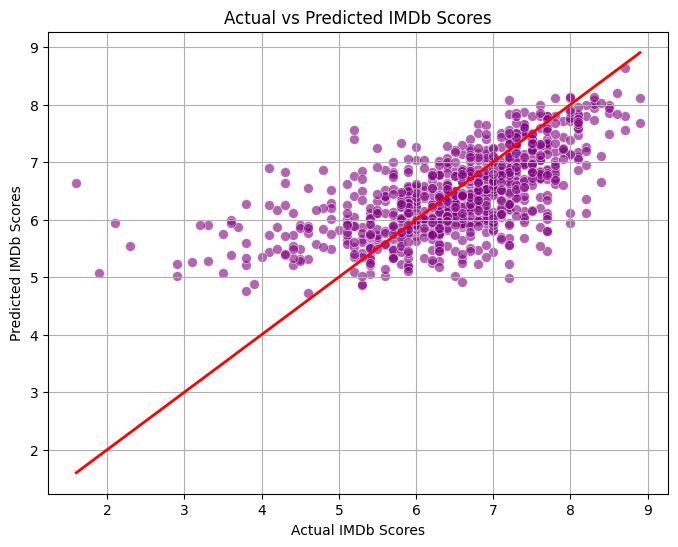

In [105]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", alpha=0.6, s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted IMDb Scores')
plt.xlabel('Actual IMDb Scores')
plt.ylabel('Predicted IMDb Scores')
plt.grid(True)
plt.show()

# 6.) Naive Bayes: 
A probabilistic classifier based on Bayes' theorem, assuming independence between features. Useful for text classification, such as spam filtering.

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
# Separate features and target variable
X = df.drop('IMDb score', axis=1)
y = df['IMDb score']

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Reshape y_train and y_test for Naive Bayes
y_train = y_train.astype('int')  # Ensure target variable is integer
y_test = y_test.astype('int')

In [110]:
# Instantiate and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [111]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 8, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5, 8, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 7, 7, 7, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7,
       7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5,
       5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 7, 5,

In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 22.53%


In [113]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))



Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         4
           3       1.00      0.00      0.00        16
           4       1.00      0.00      0.00        43
           5       0.20      0.92      0.33       144
           6       0.00      0.00      0.00       298
           7       0.34      0.19      0.24       232
           8       0.30      0.06      0.10        51

    accuracy                           0.23       790
   macro avg       0.61      0.15      0.08       790
weighted avg       0.24      0.23      0.14       790



##### Conclusion:
The model's performance is poor, with an accuracy of only 22.53% and low precision and recall for most classes. The class imbalance and Naive Bayes assumptions are likely causing the model to favor certain classes while failing to predict others.

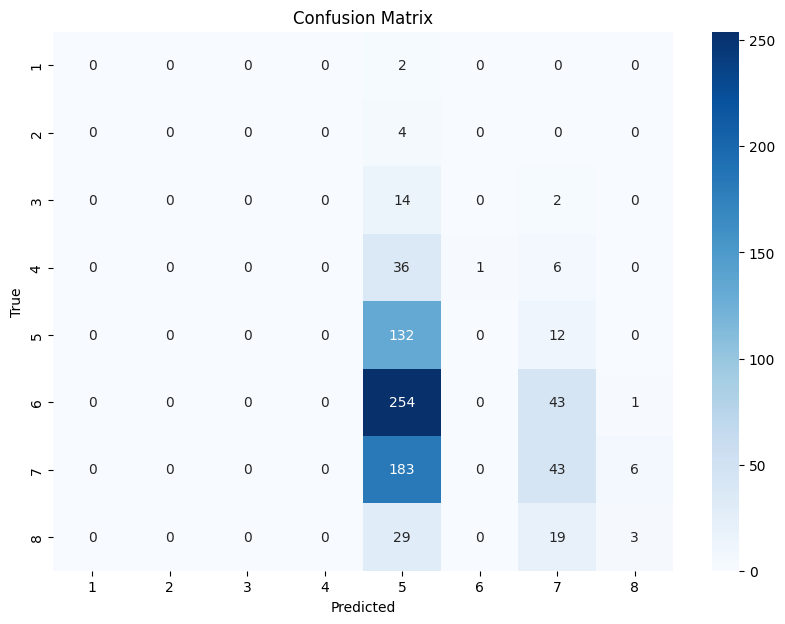

In [114]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 9), yticklabels=range(1, 9))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix highlights that the Naive Bayes model is highly biased towards predicting class 5, which is the most frequent class in the dataset. This results in high misclassification rates for less frequent classes like 1, 2, and 6.

The majority of predictions are concentrated on a small subset of classes, showing that the model has not learned to differentiate between all the classes effectively. The off-diagonal values are large, indicating that the model has a high number of false positives and false negatives.

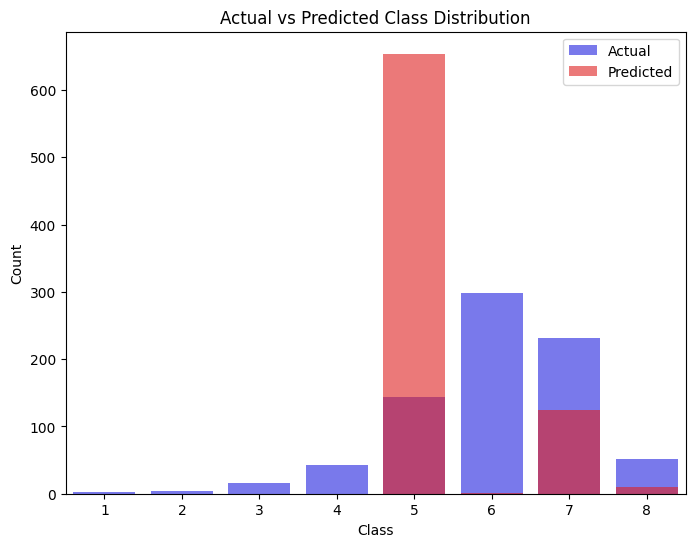

In [115]:
# Plot the actual vs predicted class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label='Actual', color='blue', alpha=0.6)
sns.countplot(x=y_pred, label='Predicted', color='red', alpha=0.6)
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()

The plot compares the actual and predicted class distributions, helping visualize how well the model's predictions align with the true class distribution.

### 2.) Unsupervised Learning:

Definition: In unsupervised learning, the model is trained on unlabeled data, where the system tries to identify patterns and structure.

Use Cases: Clustering (grouping similar data) and Dimensionality reduction.

Examples:

# K-Means Clustering:
A popular clustering algorithm that groups data into 'K' clusters.

In [116]:
from sklearn.cluster import KMeans

In [117]:
# Drop 'IMDb score' column 
X = df.drop('IMDb score', axis=1)
y = df['IMDb score']


As there is no training in the K-Means Clustering Algorithm, thwrwfore we are not splitting the data into training and testing

In [118]:
# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardizing the features helps K-Means clustering work effectively and efficiently, ensuring that all variables, regardless of their original scale, are treated equally when calculating distances between data points.

In [119]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change n_clusters as per your need
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [120]:
# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

In [121]:
# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 0.04308355  0.02302183  1.06510744 -0.03531987  0.04231375  0.05115625
  -0.39584975  1.37768305  1.88995592 -0.02226629  0.48848145  1.84172855
   1.60523307  1.53669358 -0.05101266]
 [ 0.02691272 -0.13688088 -0.06178704  0.03776157 -0.06025563  0.01066335
   0.05218409 -0.09825262 -0.08011697 -0.02226629  0.67737184 -0.066945
  -0.1302096  -0.16276798 -0.06900667]
 [-0.04684318  0.16881637 -0.22622244 -0.03826527  0.06508679 -0.02833378
   0.04662867 -0.26911723 -0.43924578  0.03491957 -1.00814058 -0.44229759
  -0.29341005 -0.23203262  0.10306159]]


In [122]:
# Print the dataframe with the cluster labels
print("\nData with Clusters:")
print(df[['Movie', 'Cluster']])


Data with Clusters:
      Movie  Cluster
0        10        1
1        13        2
2        14        2
3        18        1
4        19        1
...     ...      ...
3969   3889        1
3970   3890        2
3971   3893        1
3972   3895        2
3973   3900        2

[3950 rows x 2 columns]


In [123]:
#check the inertia (sum of squared distances of samples to their closest cluster center)
print("\nInertia (sum of squared distances):", kmeans.inertia_)


Inertia (sum of squared distances): 48737.42163620116


##### Conclusion:
The inertia value of 48737.42 indicates the sum of squared distances from each data point to its assigned cluster center. A lower inertia value generally indicates that the points are closer to their cluster centers, meaning the clustering is more cohesive and well-defined.

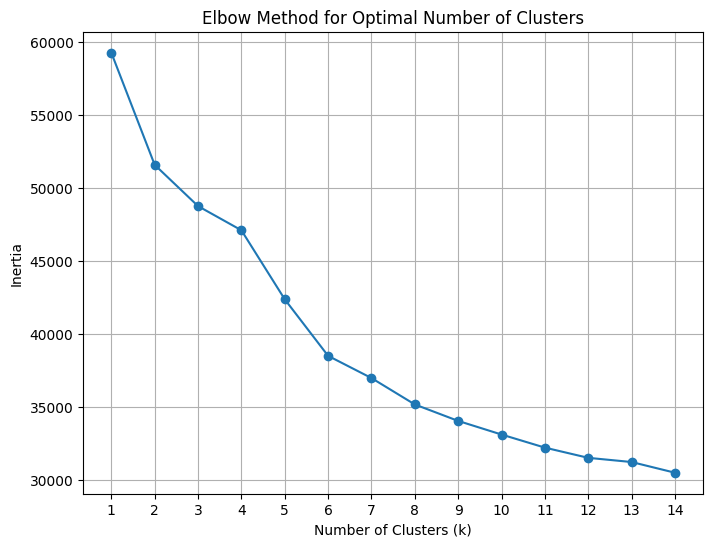

In [124]:
# Calculate inertia for different values of k (number of clusters)
inertia_values = []
k_range = range(1, 15)  # You can adjust the range to check for more clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to observe the elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

##### Conclusion: 
The elbow method helps find the best number of clusters by showing where inertia drops quickly and then slows down. The "elbow" point is the ideal number of clusters.